In [17]:
import pandas as pd
df=pd.read_csv(r"C:\Users\BEST SOLUTION SALEM\Documents\weather data analyzer\dataset.csv")
print(df.head())   

         Date  Temperature  Humidity  Rainfall
0  01-01-2015         28.4        70       2.3
1  01-02-2015         29.1        68       1.9
2  01-01-2016         27.9        72       3.1
3  01-02-2016         28.6        69       2.7
4  01-01-2017         29.4        67       2.5


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
         Date  Temperature  Humidity  Rainfall
0  01-01-2015         28.4        70       2.3
1  01-02-2015         29.1        68       1.9
2  01-01-2016         27.9        72       3.1
3  01-02-2016         28.6        69       2.7
4  01-01-2017         29.4        67       2.5
Statistical summary:
                                 Date  Temperature   Humidity  Rainfall  \
count                             14    14.000000  14.000000  14.00000   
mean   2018-02-09 05:08:34.285714176    31.721429  63.071429   1.90000   
min              2015-01-01 00:00:00    27.900000  55.000000   1.10000   
25%              2016-04-24 18:00:00    29.175000  58.250000   1.42500   
50%              2018-01-16 12:00:00    31.650000  63.500000   1.85000   
75%              2019-10-09 12:00:00    34.025000  67.750000   2.25000   
max              2022-01-01 00:00:00    36.000000  72.000000   3

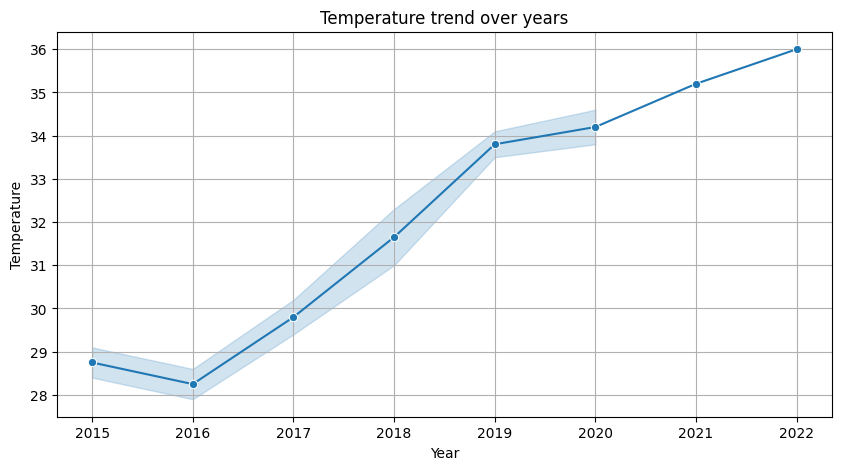

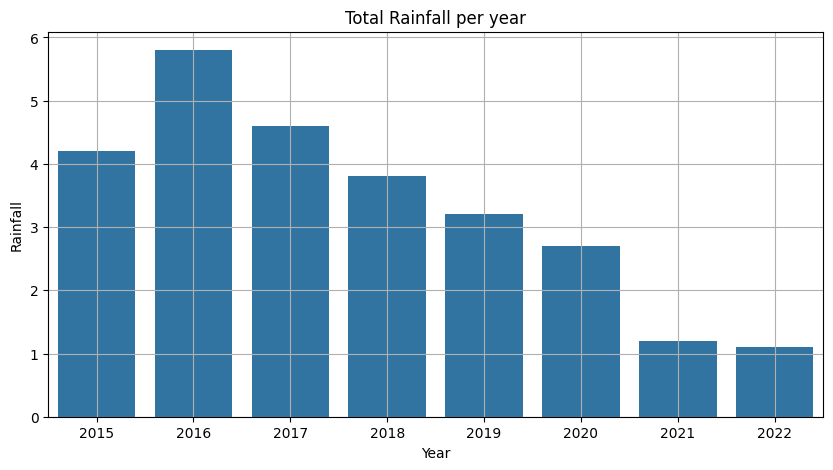

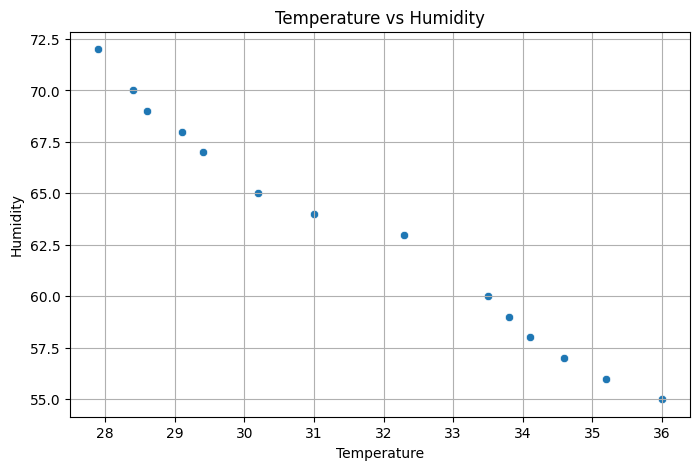

Columns: Index(['Date', 'Temperature', 'Humidity', 'Rainfall', 'Year'], dtype='object')

Model Evaluation:
MSE:0.57
RMSE:0.76


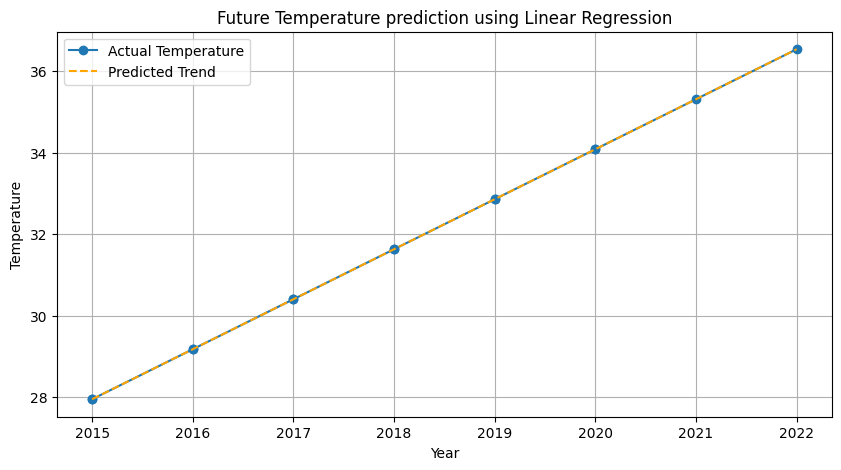

In [18]:
import pandas as pd
print(type(df))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from datetime import datetime
print(type(df))
df=pd.read_csv("C:\\Users\\BEST SOLUTION SALEM\\Documents\\weather data analyzer\\dataset.csv")
print(type(df))
print(df.head())
df.columns=['Date','Temperature','Humidity','Rainfall']
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
df['Year']=df['Date'].dt.year
df.fillna(df.mean(numeric_only=True),inplace=True)
print("Statistical summary:\n",df.describe())
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='Year',y='Temperature',marker='o')
plt.title('Temperature trend over years')
plt.grid()
plt.show()
rainfall_by_year= df.groupby('Year')['Rainfall'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=rainfall_by_year,x='Year',y='Rainfall')
plt.title('Total Rainfall per year')
plt.grid()
plt.show()
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Temperature',y='Humidity')
plt.title('Temperature vs Humidity')
plt.grid()
plt.show()
x=df[['Year']].copy()
y=df['Temperature'].copy()
x=df[['Year']].dropna() 
y=df['Temperature'].loc[x.index]
model=LinearRegression()
model.fit(x,y)
predictions=model.predict(x)
df.loc[x.index,'Temperature']=model.predict(x)
print("Columns:",df.columns)
mse=mean_squared_error(y,df.loc[x.index,'Temperature'])
rmse=mse**0.5
print(f"\nModel Evaluation:\nMSE:{mse:.2f}\nRMSE:{rmse:.2f}")
df_sorted=df.dropna(subset=['Temperature']).sort_values(by='Year')
df['predictedTemperature']=model.predict(x)
plt.figure(figsize=(10,5))
plt.plot(df_sorted['Year'],df_sorted['Temperature'],marker='o',label='Actual Temperature')
plt.plot(df_sorted['Year'],df_sorted['Temperature'],color='orange',label='Predicted Trend',linestyle='--')
plt.title('Future Temperature prediction using Linear Regression')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()


